In [1]:
# Application of FL task
from MLModel import *
from FLModel import *
from utils import *

from torchvision import datasets, transforms
import torch
import numpy as np
import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

In [2]:
def load_cnn_mnist(num_users):
    train = datasets.MNIST(root="~/data/", train=True, download=True, transform=transforms.ToTensor())
    train_data = train.data.float().unsqueeze(1)
    train_label = train.targets

    mean = train_data.mean()
    std = train_data.std()
    train_data = (train_data - mean) / std

    test = datasets.MNIST(root="~/data/", train=False, download=True, transform=transforms.ToTensor())
    test_data = test.data.float().unsqueeze(1)
    test_label = test.targets
    test_data = (test_data - mean) / std

    # split MNIST (training set) into non-iid data sets
    non_iid = []
    user_dict = mnist_noniid(train_label, num_users)
    for i in range(num_users):
        idx = user_dict[i]
        d = train_data[idx]
        targets = train_label[idx].float()
        non_iid.append((d, targets))
    non_iid.append((test_data.float(), test_label.float()))
    return non_iid

In [3]:
"""
1. load_data
2. generate clients (step 3)
3. generate aggregator
4. training
"""
client_num = 4
d = load_cnn_mnist(client_num)

In [4]:
"""
FL model parameters.
"""
import warnings
warnings.filterwarnings("ignore")

lr = 0.15

fl_param = {
    'output_size': 10,
    'client_num': client_num,
    'model': MNIST_CNN,
    'data': d,
    'lr': lr,
    'E': 500,
    'C': 1,
    'eps': 4.0,
    'delta': 1e-5,
    'q': 0.01,
    'clip': 0.1,
    'tot_T': 10,
    'epsilon': 1.0,
    'batch_size': 128,
    'device': device,
    'noise_type': 'laplacian'
}

fl_entity = FLServer(fl_param).to(device)

Laplacian noise epsilon = 1.0


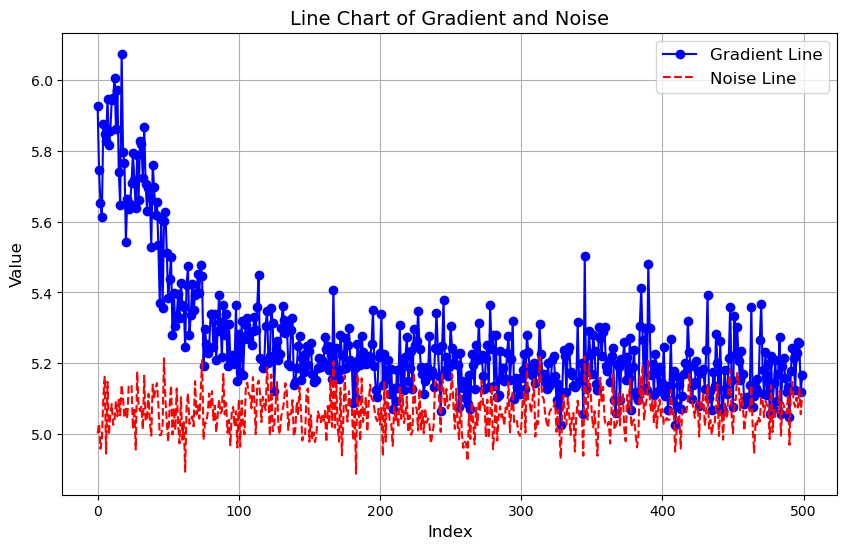

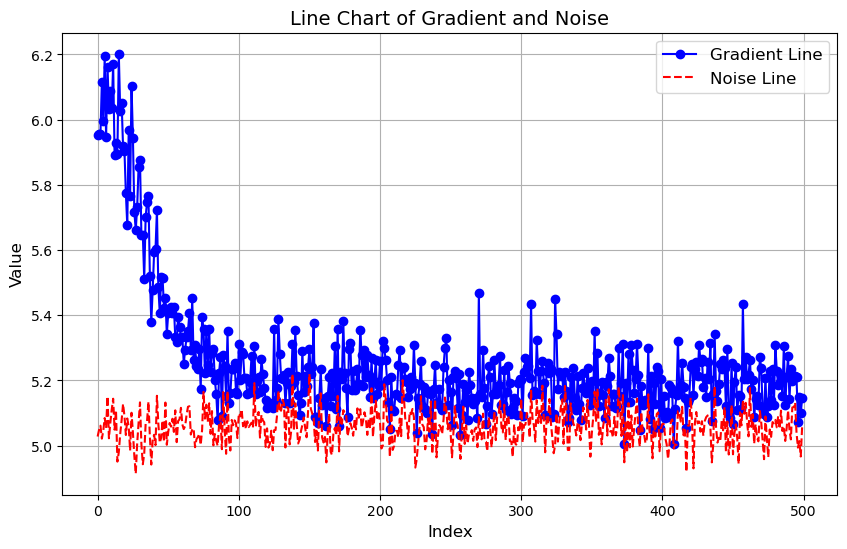

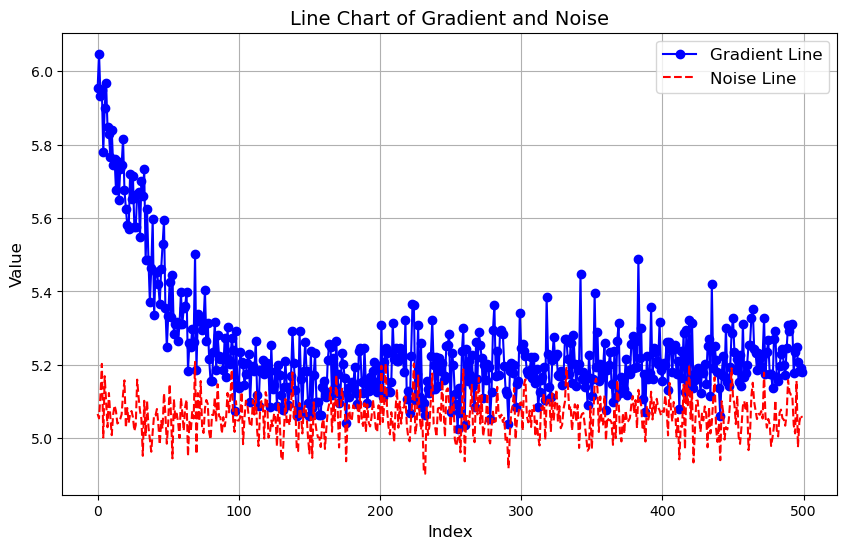

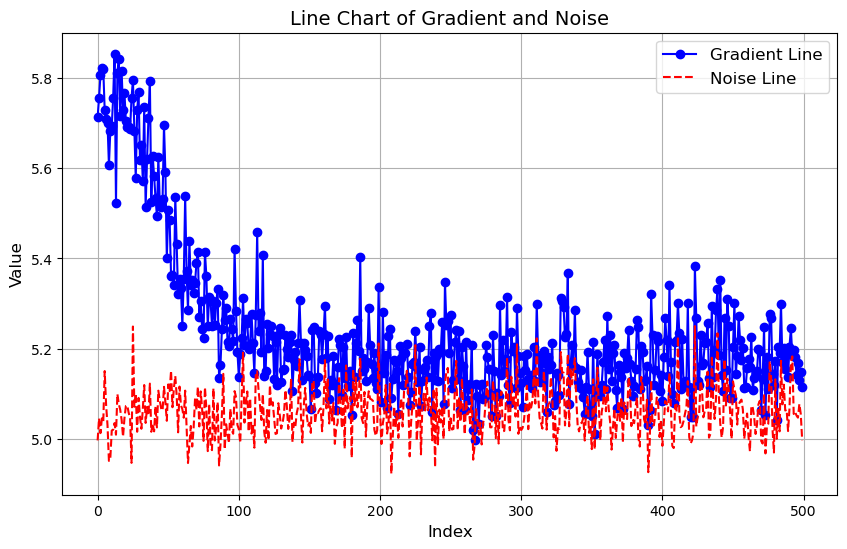

global epochs = 1, acc = 0.2347  Time taken: 570.17s


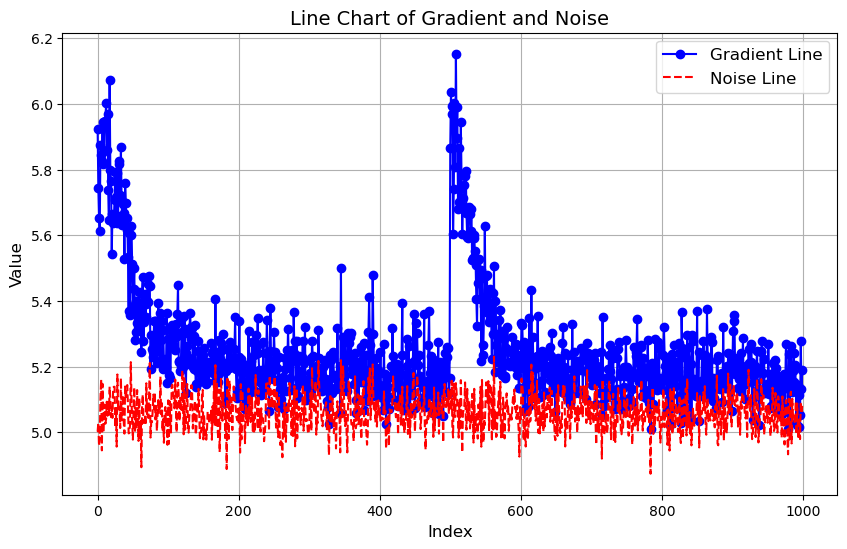

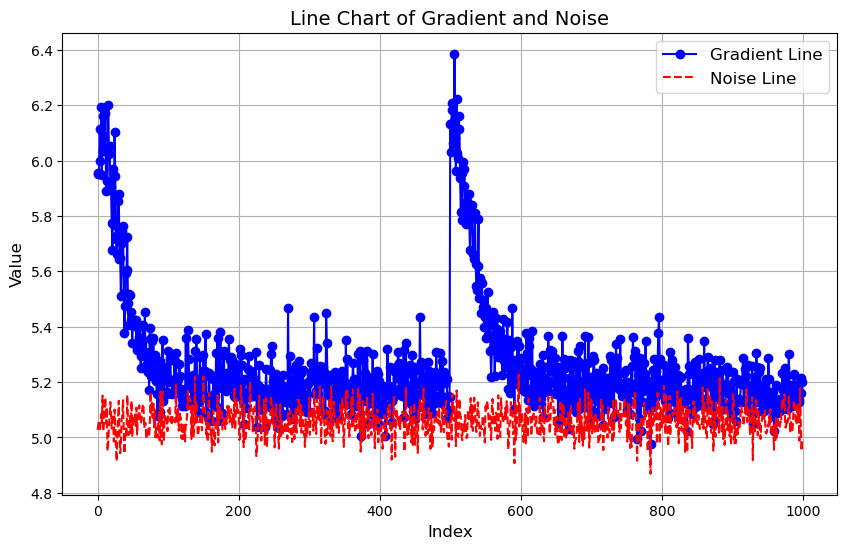

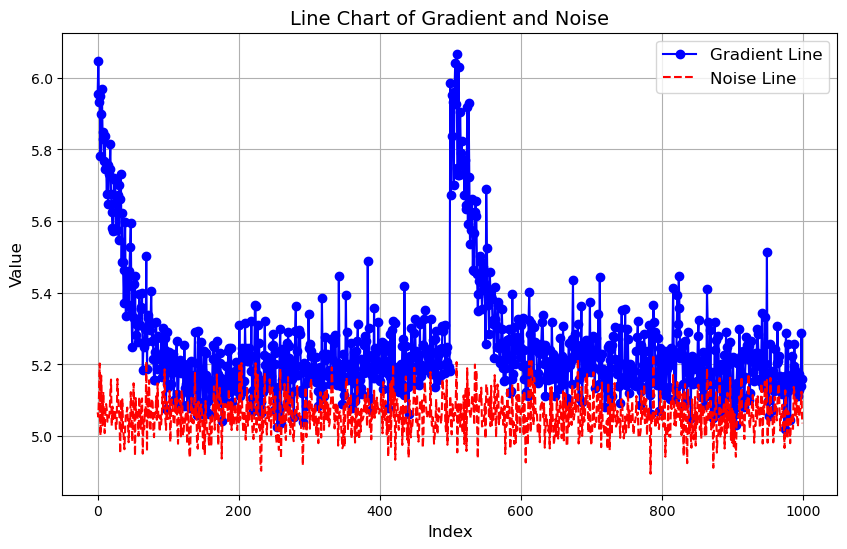

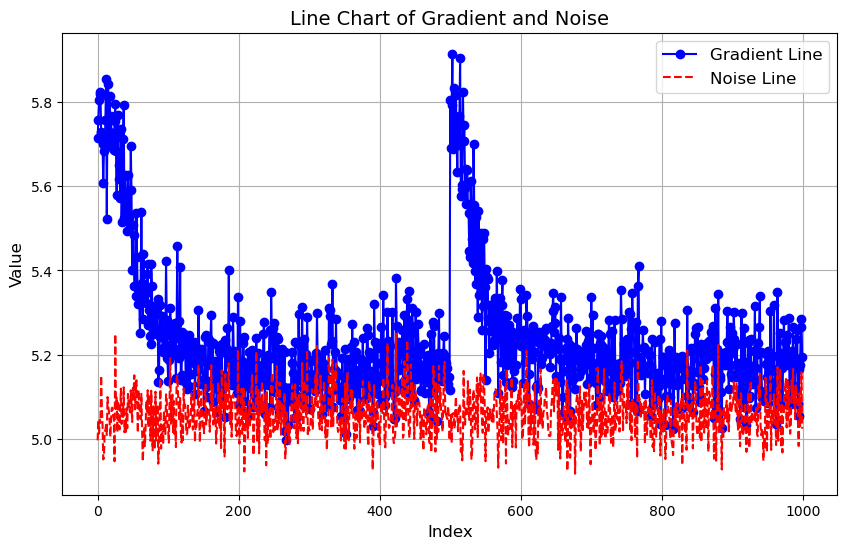

global epochs = 2, acc = 0.2820  Time taken: 1166.47s


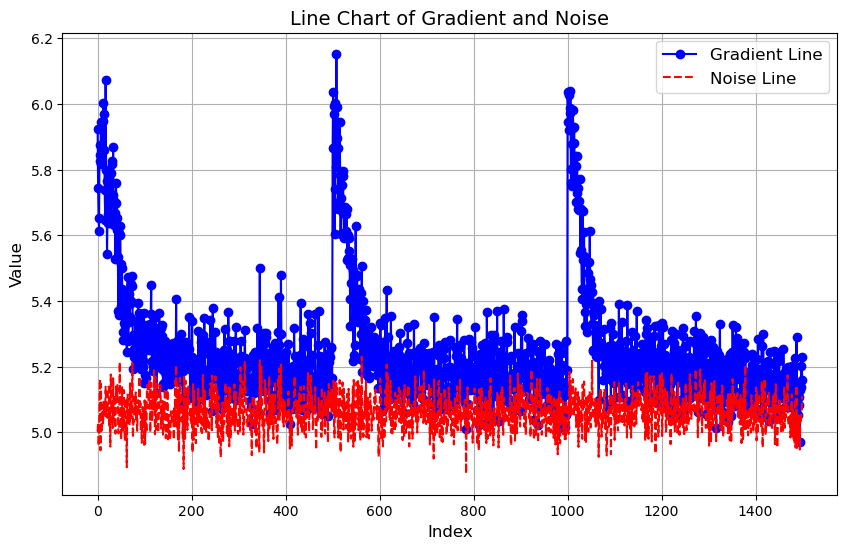

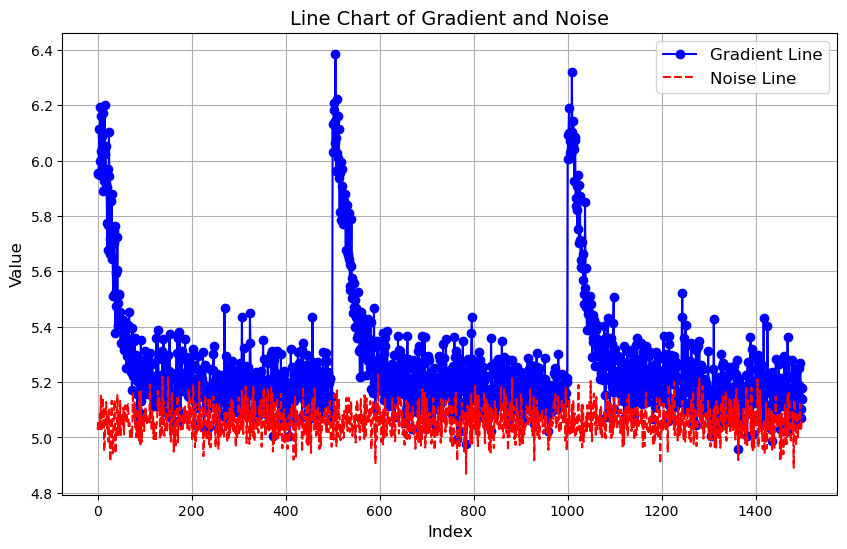

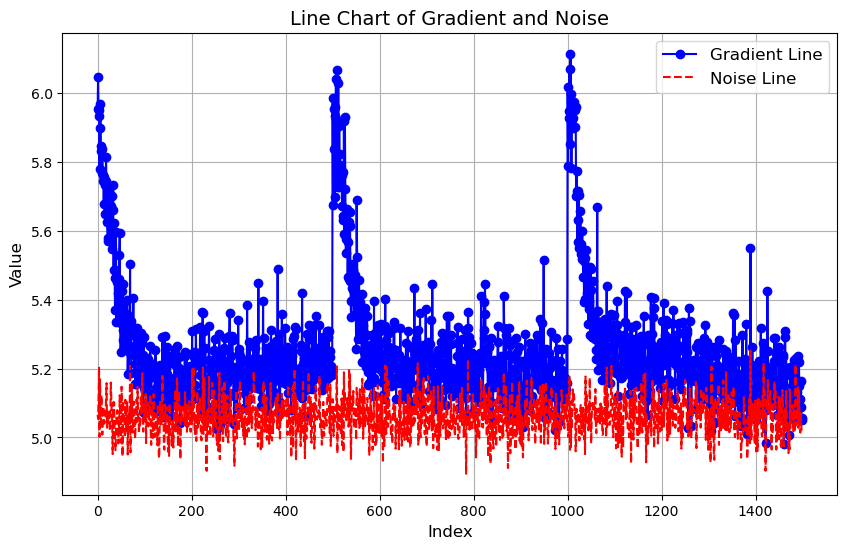

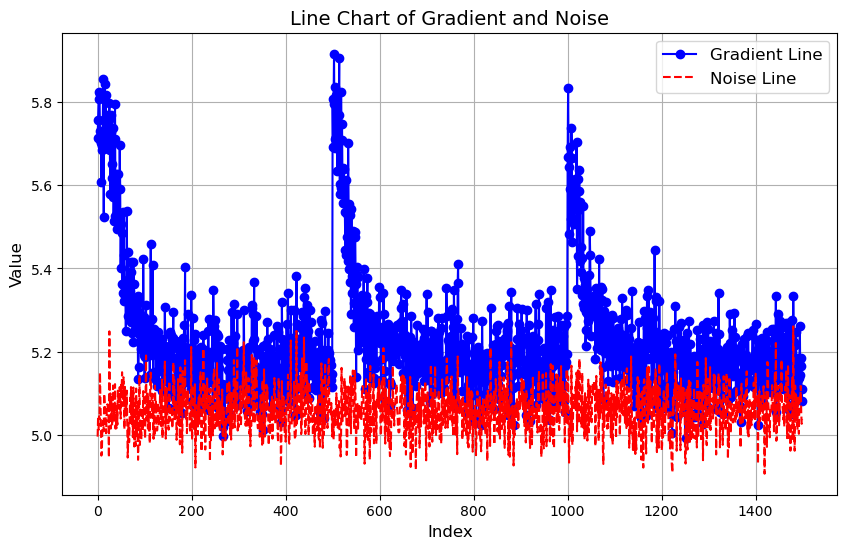

global epochs = 3, acc = 0.4264  Time taken: 1735.64s


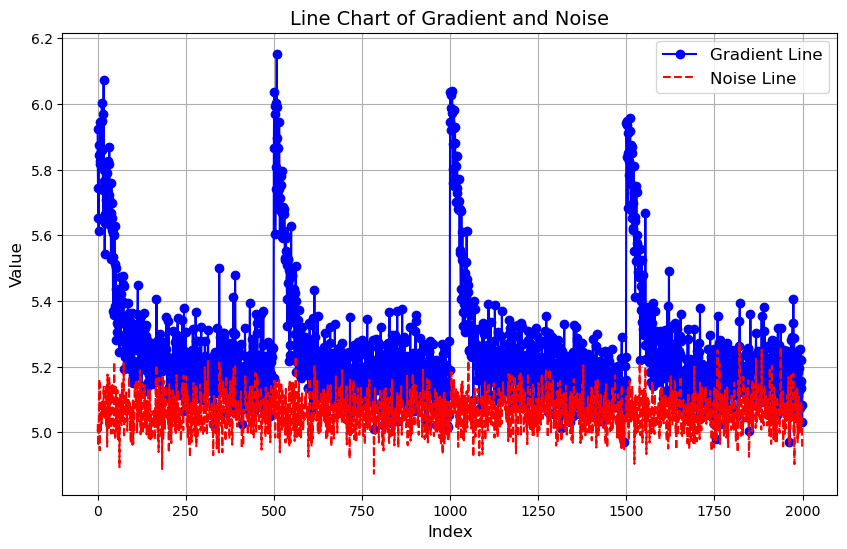

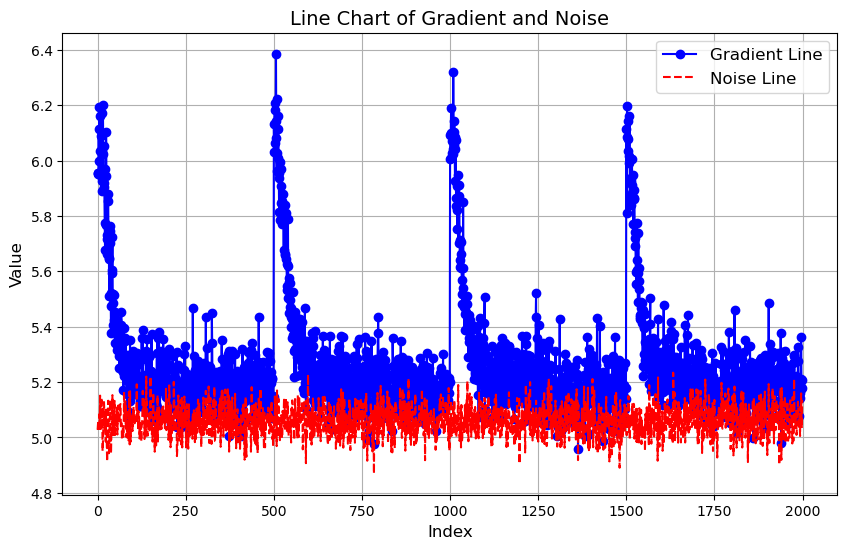

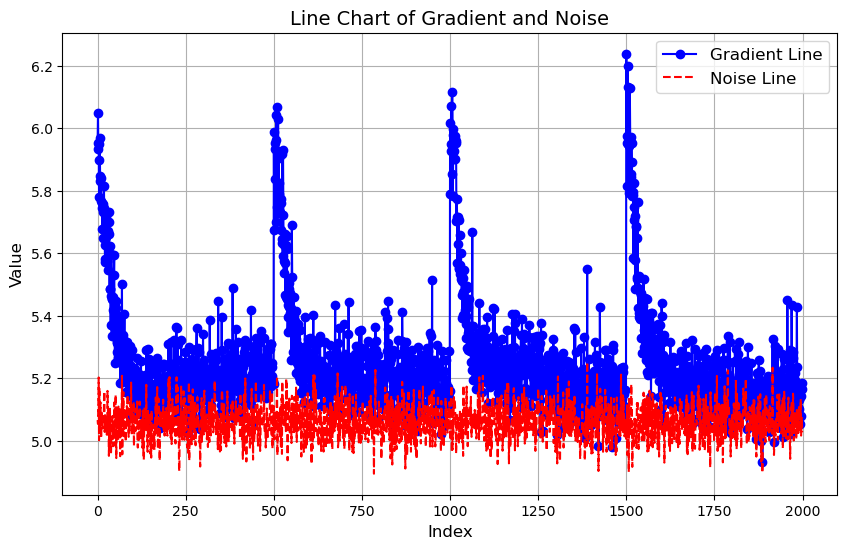

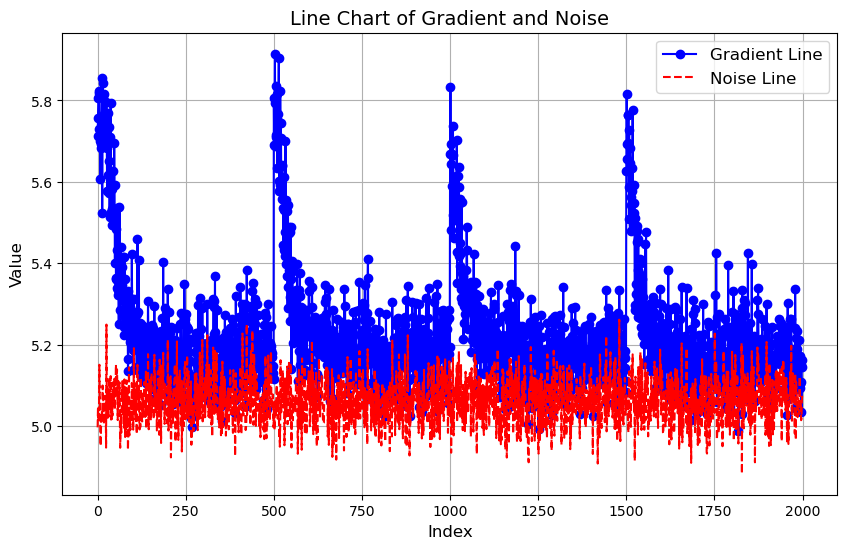

global epochs = 4, acc = 0.5059  Time taken: 2318.00s


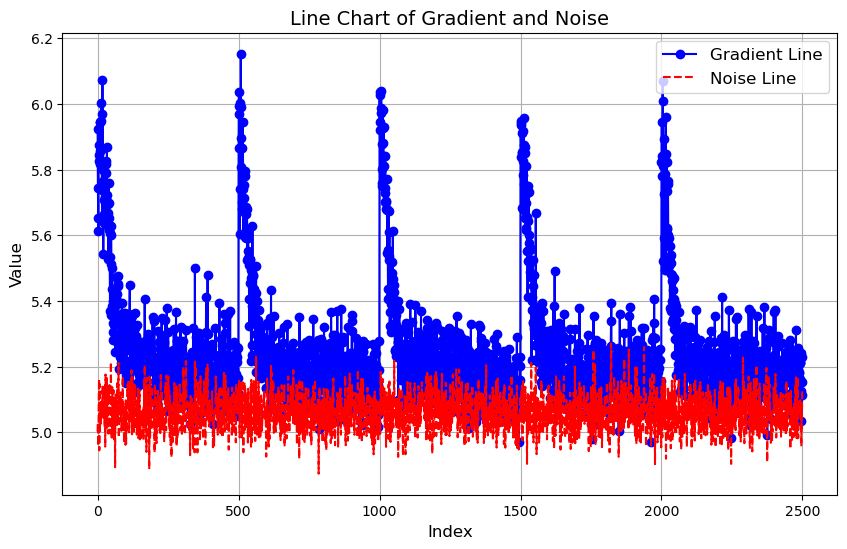

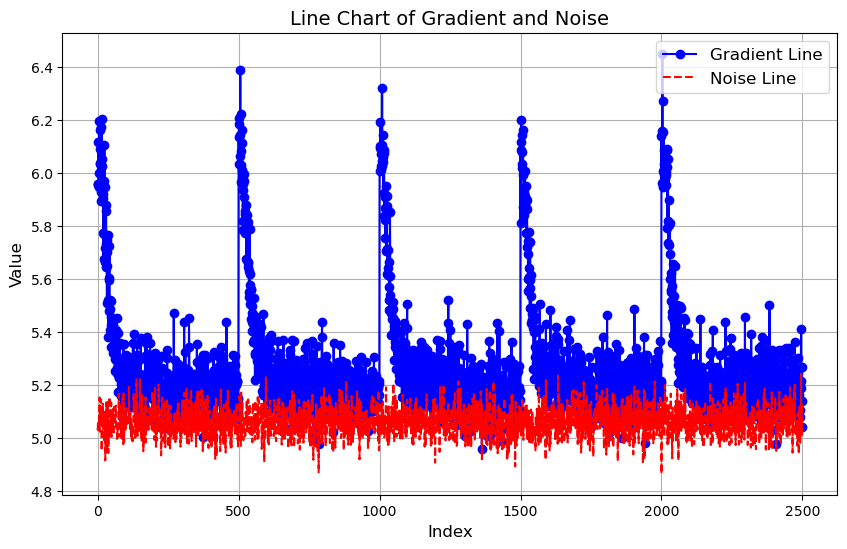

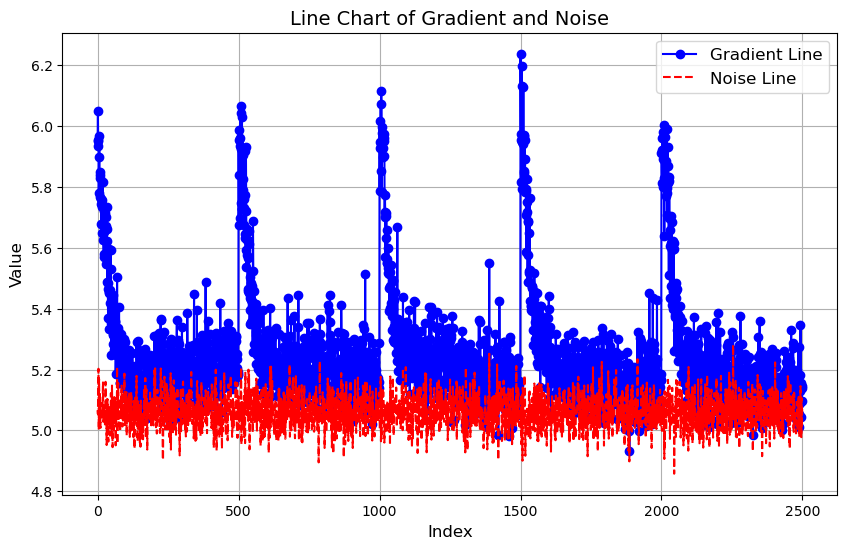

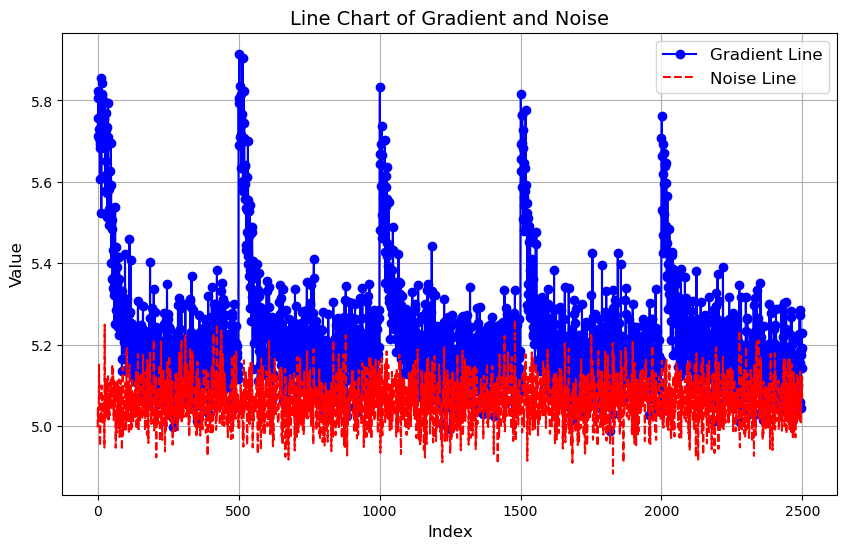

global epochs = 5, acc = 0.5772  Time taken: 2891.15s


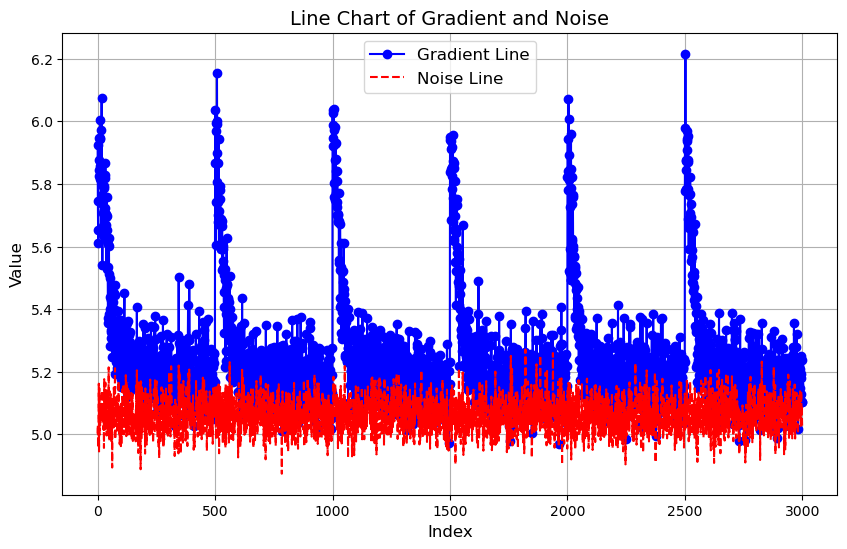

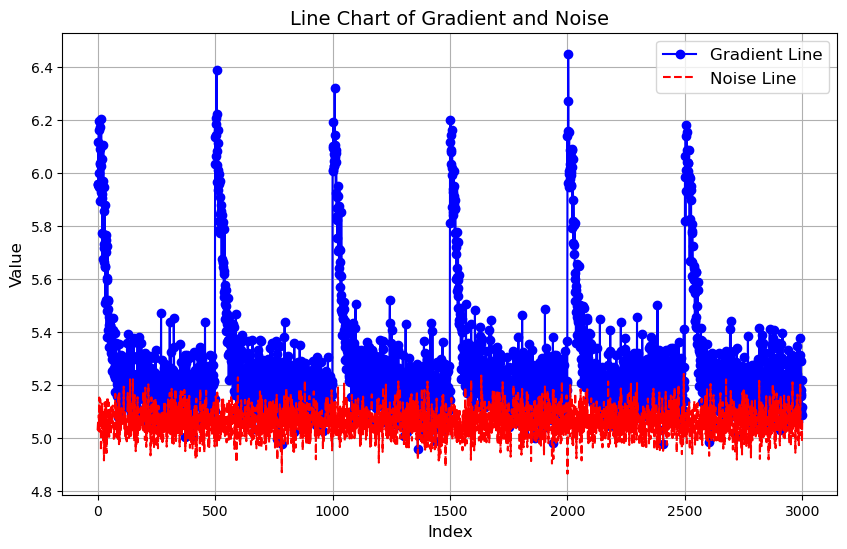

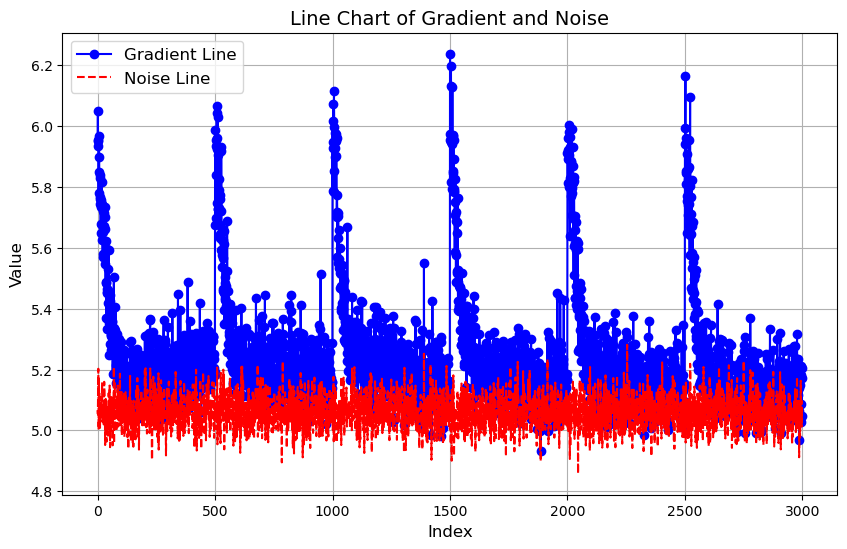

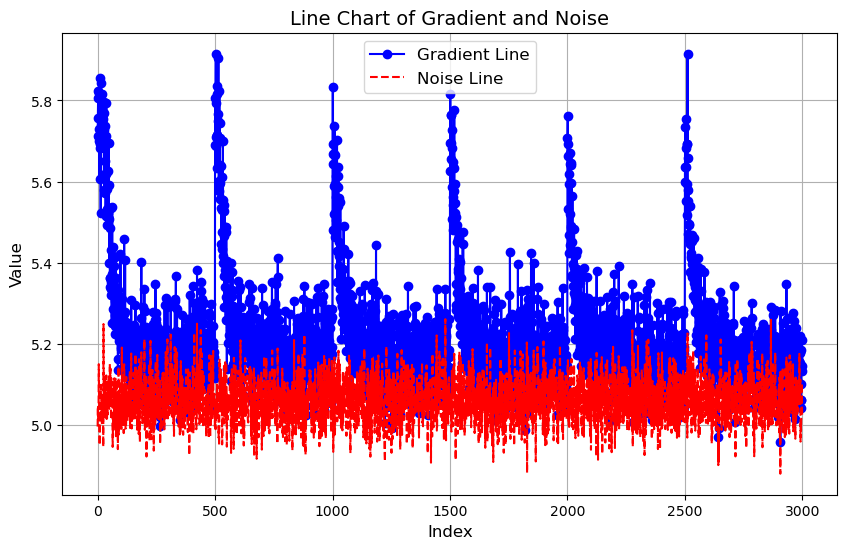

global epochs = 6, acc = 0.6194  Time taken: 3464.32s


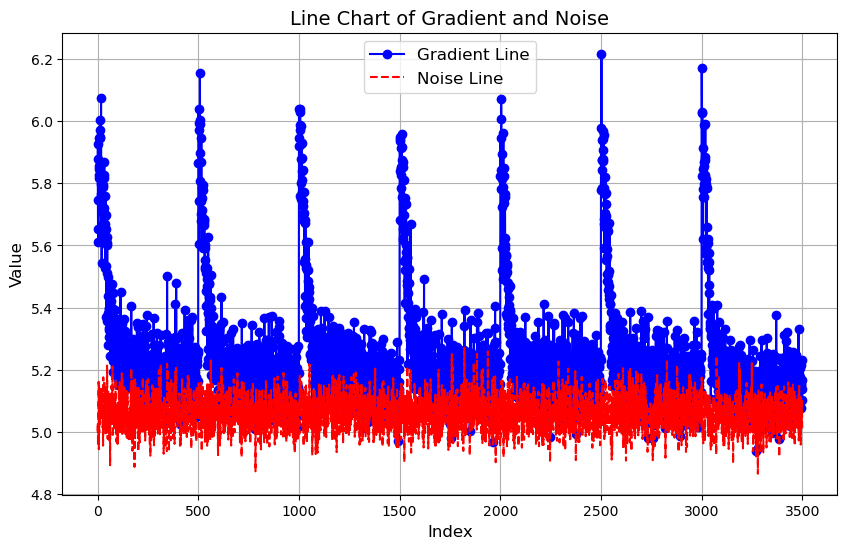

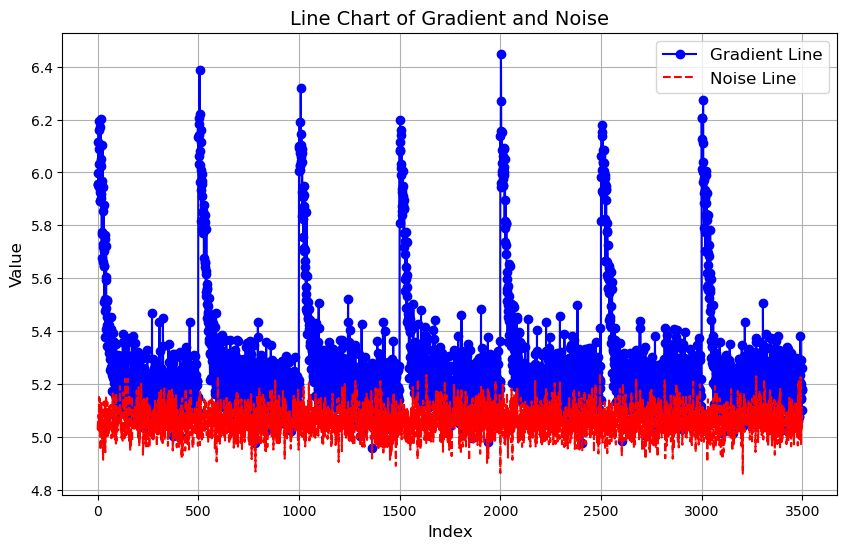

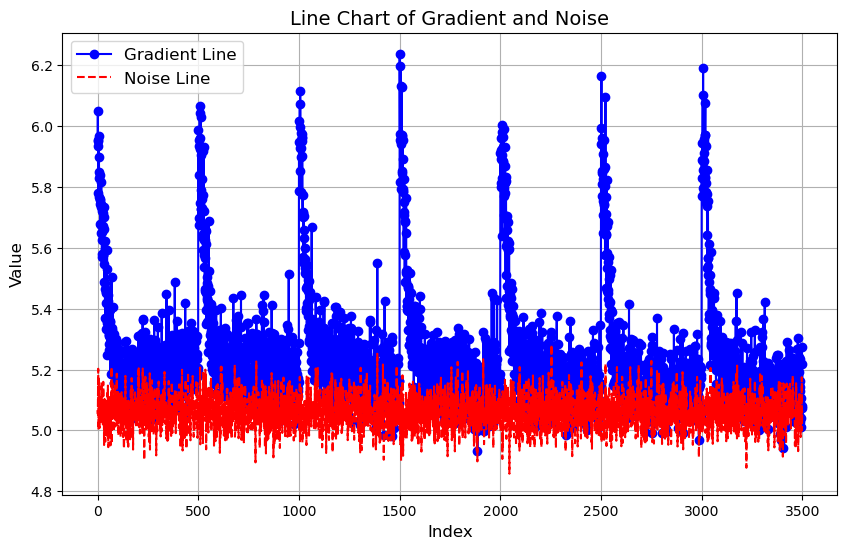

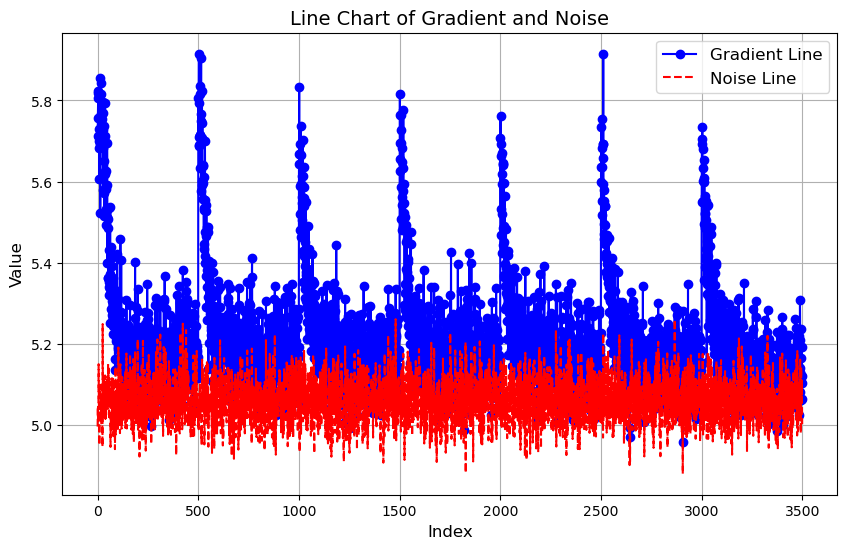

global epochs = 7, acc = 0.6508  Time taken: 4008.52s


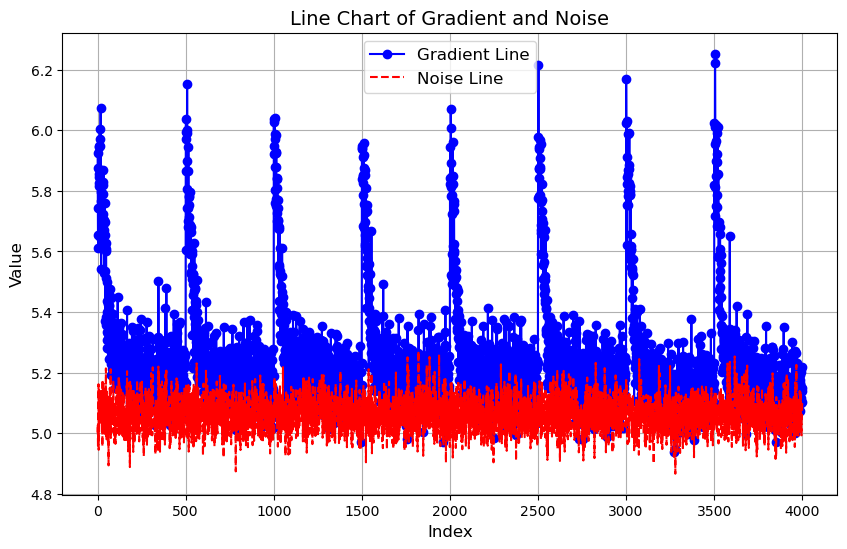

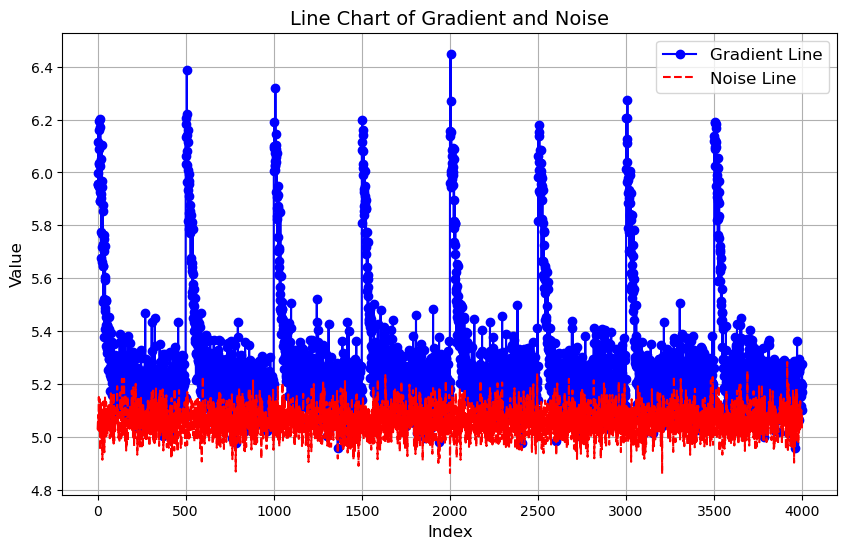

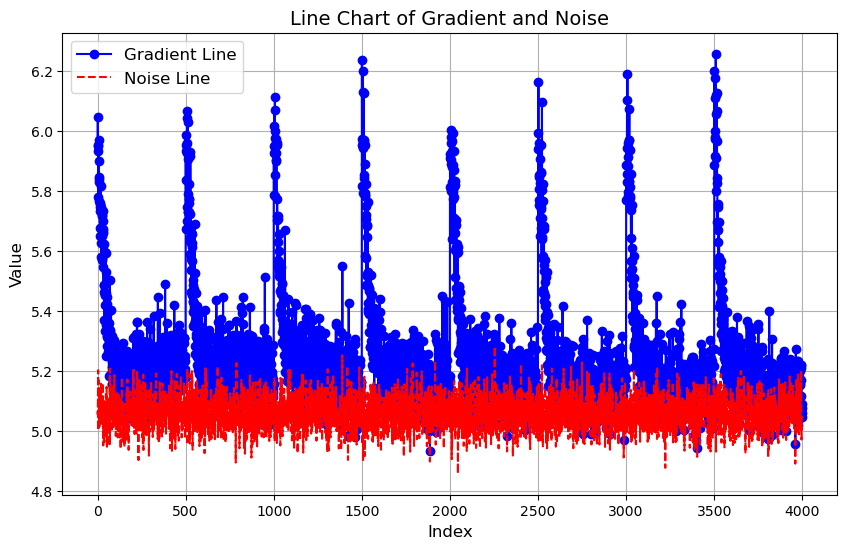

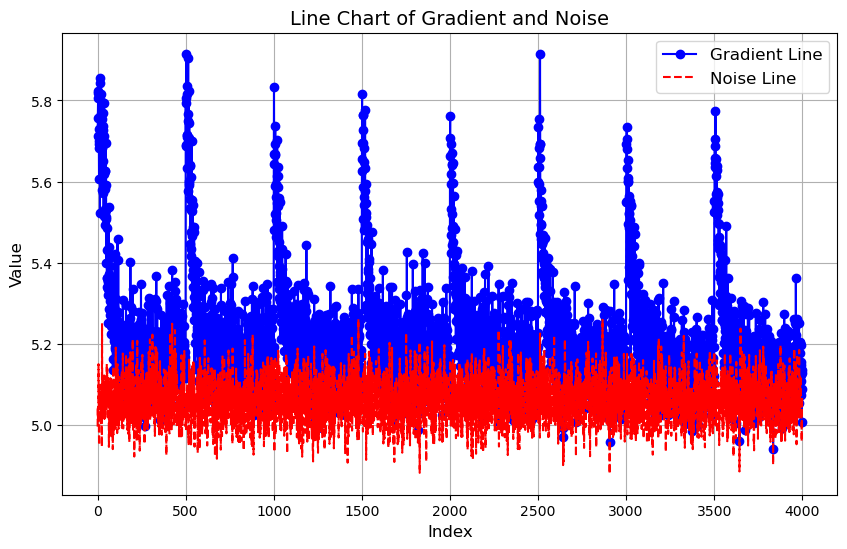

global epochs = 8, acc = 0.6840  Time taken: 4551.83s


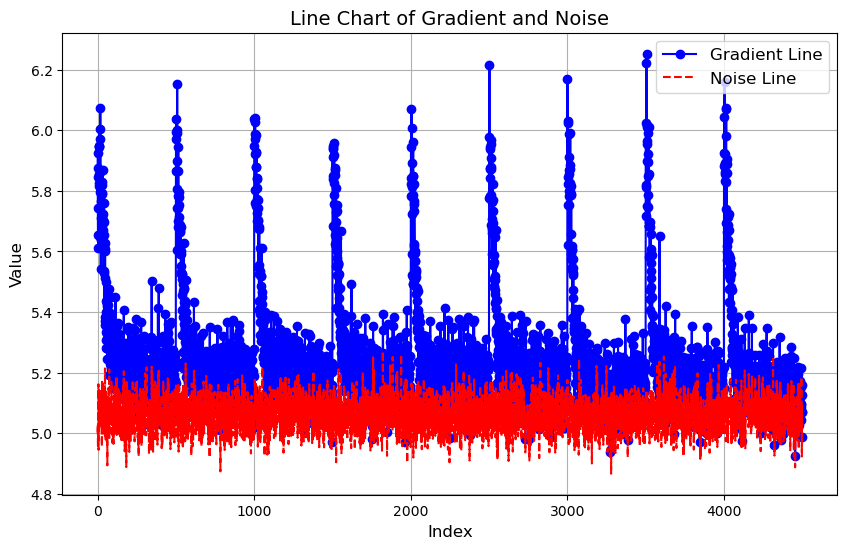

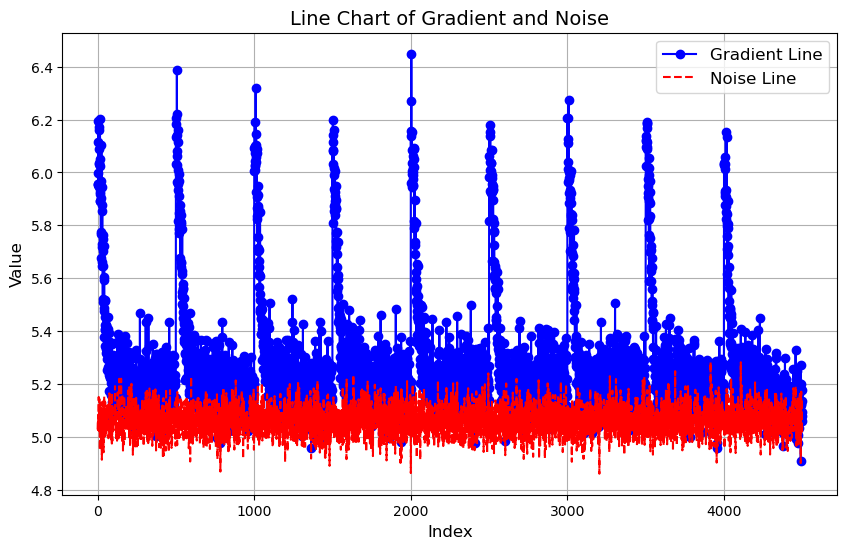

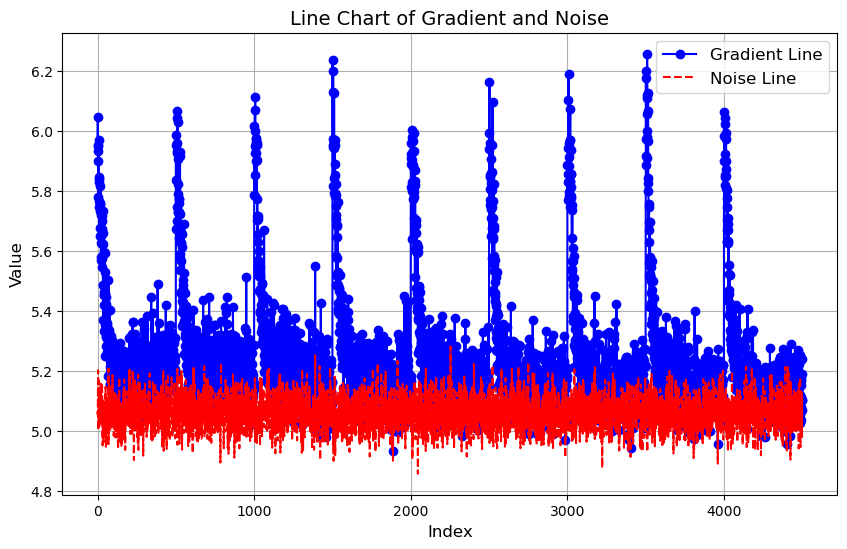

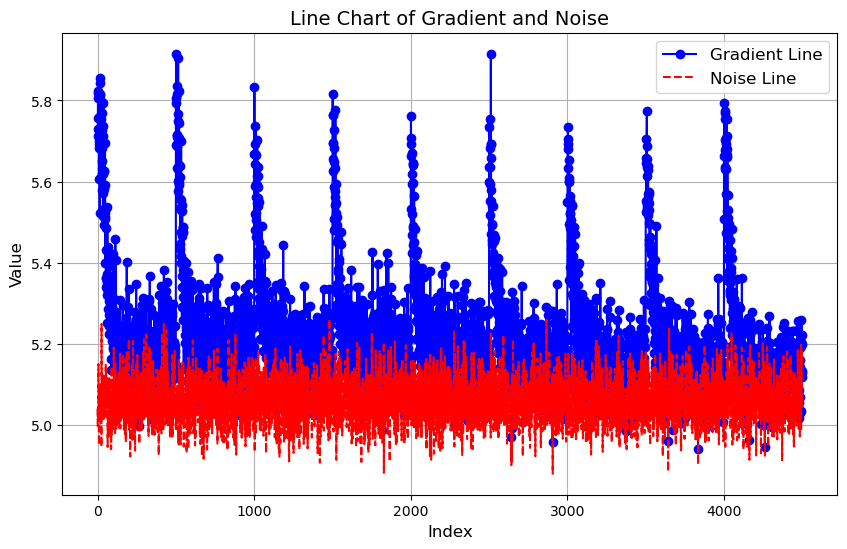

global epochs = 9, acc = 0.7079  Time taken: 5092.57s


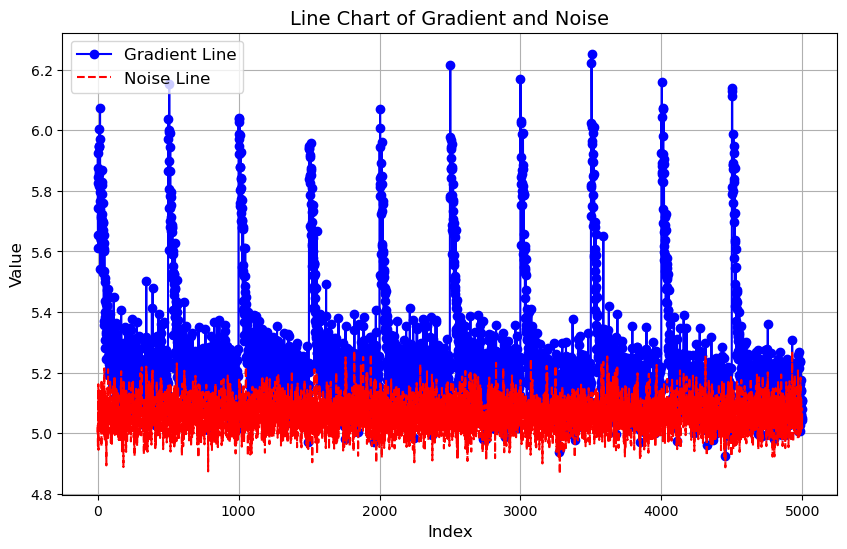

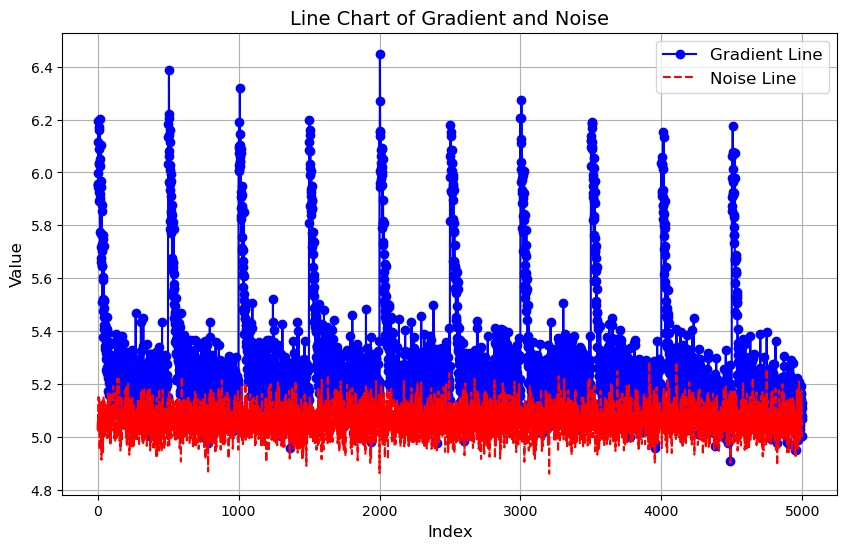

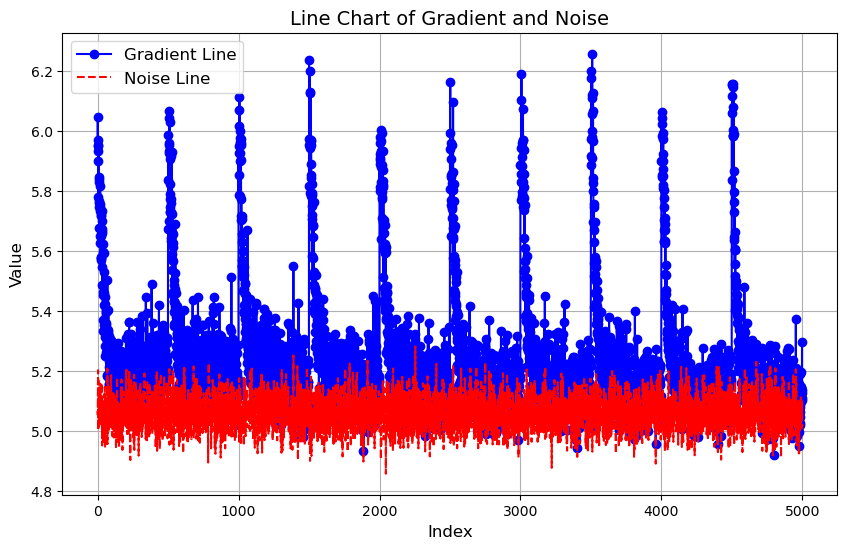

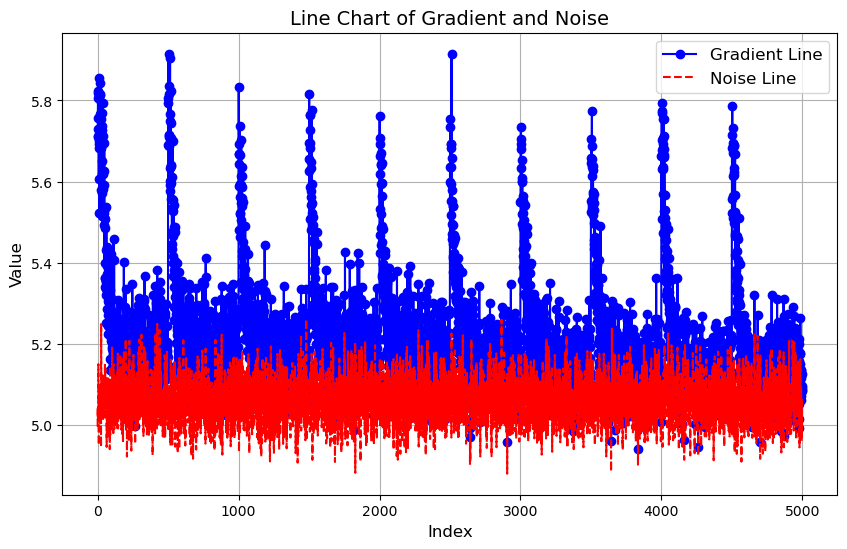

global epochs = 10, acc = 0.7408  Time taken: 5624.23s


In [5]:
import time

acc = []
start_time = time.time()
for t in range(fl_param['tot_T']):
    acc += [fl_entity.global_update()]
    print("global epochs = {:d}, acc = {:.4f}".format(t+1, acc[-1]), " Time taken: %.2fs" % (time.time() - start_time))

In [ ]:
# SGD (mnt=0.9)